In [1]:
from src.main import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
report_11 = Report('src/data/format-2011-world-copper-2063-trade.json', '2011')
report_12 = Report('src/data/format-2012-world-copper-2063-trade.json', '2012')
report_13 = Report('src/data/format-2013-world-copper-2063-trade.json', '2013')
report_14 = Report('src/data/format-2014-world-copper-2063-trade.json', '2014')
report_15 = Report('src/data/format-2015-world-copper-2063-trade.json', '2015')

report_16 = Report('src/data/format-2016-world-copper-2063-trade.json', '2016')
report_17 = Report('src/data/format-2017-world-copper-2063-trade.json', '2017')
report_18 = Report('src/data/format-2018-world-copper-2063-trade.json', '2018')
report_19 = Report('src/data/format-2019-world-copper-2063-trade.json', '2019')
report_20 = Report('src/data/format-2020-world-copper-2063-trade.json', '2020')


In [3]:
reports = [
    report_11, report_12, report_13, report_14, report_15,
    report_16, report_17, report_18, report_19, report_20
]




def batch_fn(inject, **args):
    for report in reports:
        inject(report, **args)


In [4]:
"""
for report in reports:
    write_to_excel(report.data_overview(), 'excel/' +
                   report.name + '_copper_2063_trade.xlsx')
"""


"\nfor report in reports:\n    write_to_excel(report.data_overview(), 'excel/' +\n                   report.name + '_copper_2063_trade.xlsx')\n"

In [5]:
report_20.set_attributes()
pd.DataFrame(report_20.nodes)

,name,code,E,IS,OS,DC,BC,CC
0,China,156,2.394760e+02,21028529168,5766775,0.727273,0.250287,0.570825
1,Canada,124,2.531905e+01,520040642,2876179730,0.418182,0.072287,0.443593
2,Spain,724,2.451443e+01,1180125772,756916668,0.363636,0.061514,0.423197
3,Rep. of Korea,410,1.298657e+01,2883725636,207376590,0.300000,0.018496,0.440936
4,USA,842,1.192195e+01,46068666,2370292032,0.418182,0.093023,0.383523
...,...,...,...,...,...,...,...,...
106,Iceland,352,6.772843e-07,193,0,0.009091,0.000000,0.256061
107,Qatar,634,1.810254e-07,252,0,0.009091,0.000000,0.292925
108,Côte d'Ivoire,384,7.242412e-08,71,0,0.009091,0.000000,0.277793
109,New Zealand,554,2.485497e-08,13,0,0.009091,0.000000,0.240517


In [6]:
pd.DataFrame(report_20.net.getAdjacencyEntropies().items())

,0,1
0,156,239.476039
1,32,0.000028
2,860,8.717959
3,51,1.833378
4,528,8.185341
...,...,...
106,214,0.000334
107,368,0.000002
108,454,0.000017
109,533,0.000001


In [7]:
# report_11.net.draw()

In [8]:
overview = report_16.data_overview()
# write_to_excel(overview, 'excel/t1_data_overview_16.xlsx')
overview

,Reporter Code,Reporter,Partner Code,Partner,Trade Flow,Trade Value (US$)
1,32,Argentina,100,Bulgaria,Export,20025236
2,32,Argentina,246,Finland,Export,137876595
3,32,Argentina,276,Germany,Export,155770517
4,32,Argentina,392,Japan,Export,145075089
5,32,Argentina,699,India,Export,36485970
...,...,...,...,...,...,...
1147,894,Zambia,710,South Africa,Import,313513
1148,894,Zambia,710,South Africa,Export,19297
1149,894,Zambia,757,Switzerland,Export,403
1150,894,Zambia,804,Ukraine,Export,2


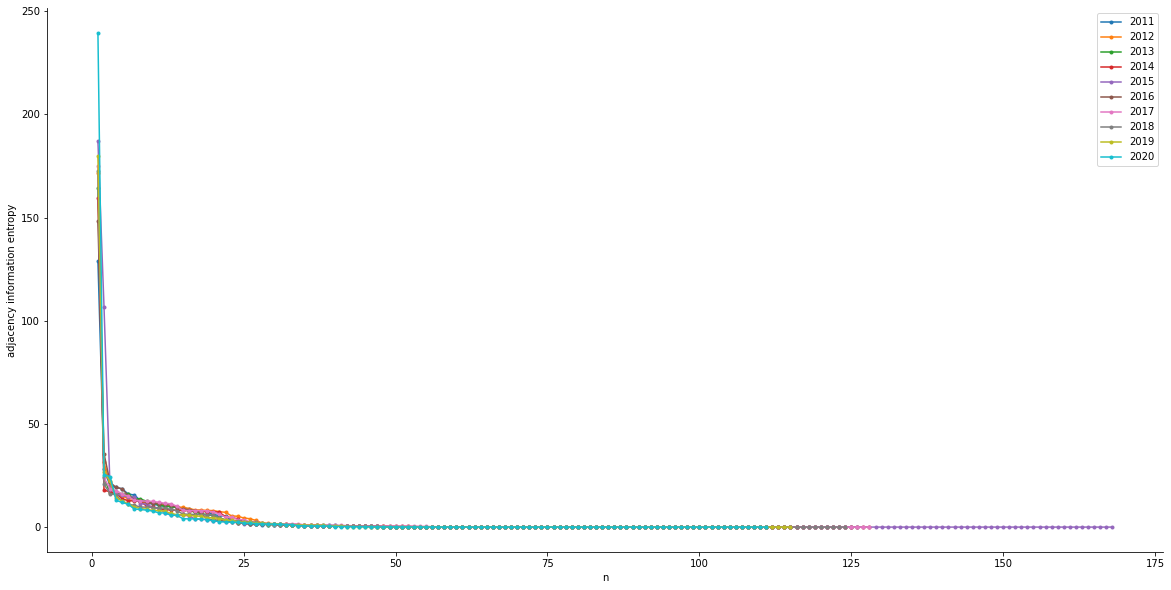

In [9]:
def draw_entropy_plots(slice=None):
    fig, axes = plt.subplots(figsize=(20, 10))
    y_label = "adjacency information entropy"

    def draw_entropy_plot(report, axes):
        nodes = report.net.sortedNodes
        x = np.arange(len(nodes)) + 1
        y = [node['E'] for node in nodes]
        axes.spines['right'].set_visible(False)
        axes.spines['top'].set_visible(False)
        if slice is None:
            axes.plot(x, y, '.-', label=report.name)
        else:
            axes.plot(x[slice[0]: slice[1]], y[slice[0]: slice[1]],
                      '-', label=report.name)

    batch_fn(draw_entropy_plot, axes=axes)

    axes.legend()
    axes.set_xlabel('n')
    axes.set_ylabel(y_label)


draw_entropy_plots()


In [10]:
for report in reports:
    report.cluster_nodes()

In [11]:
table_entropy_cluster= show_cluster_list(reports)
table_entropy_cluster
# write_to_excel(table_entropy_cluster, 'excel/entropy_cluster.xlsx')


,code,code,code,code,code,code,code,code,code,code
label,,,,,,,,,,
1,156,156,156,156,156,156,156,156,156,156
2,710,710,410,"724,276,100",528,528,100,410,152,"124,724"
3,"410,276,56,842,90",276,"276,484,124,699","410,152,842,398","276,410,152,100,842","124,410,724","410,724,152,784","152,100",724,"410,458,842"
4,"724,699,484,124,等12项","410,100,724,152,752,842,246,604","152,842,710,792,724,100,752,604","124,36,894,392,等13项","124,724,268,604","100,616,152,710,842,699,392,36,604","528,124,699,842,392,246,36,604","528,724,710,616,等10项","100,604","528,276,392,76,36,152,604,860"
5,"608,392,76","484,344,56,704,等16项","826,608,894,528,36,616,392,76,417","484,710,76","608,757,616,36,等12项","276,784,400,398","276,608,642,710,等11项","124,276,36,699,76,48","124,410,528,116,等18项","699,246,757,616,484"
6,"344,826,528,757,等104项","528,702,40,458,等101项","458,764,344,757,等101项","528,458,764,752,等101项","826,56,458,344,等145项","381,752,56,484,等98项","826,458,381,516,等103项","116,458,381,608,等104项","458,826,360,704,等92项","710,251,56,826,等92项"


In [12]:
nodes_attribute_20 = report_20.show_nodes_attribute()
# write_to_excel(nodes_attribute_20, 'excel/t2_attributes_2020.xlsx')


In [13]:
for report in reports:
    report.set_attribute_probability()


In [14]:
for report in reports:
    report.show_dt_accuracy()
    report.save_decision_tree('outputs/decision_tree_' + report.name + '.json')

决策树的正确率： 96.03174603174604 %
决策树的正确率： 92.1875 %
决策树的正确率： 95.16129032258065 %
决策树的正确率： 97.6 %
决策树的正确率： 95.83333333333334 %
决策树的正确率： 95.6896551724138 %
决策树的正确率： 92.96875 %
决策树的正确率： 97.58064516129032 %
决策树的正确率： 94.78260869565217 %
决策树的正确率： 96.3963963963964 %


In [15]:
decision_list_20 = pd.DataFrame(report_20.decision_list)[
    report_20.attribute_names + ['label']]\
    .sort_values('label')\
    .reset_index(drop=True)

print(decision_list_20)

#write_to_excel(decision_list_20, 'excel/t4_decision_list_2020.xlsx')

     IS   OS  DC  BC   CC  label
0   NaN  NaN   1 NaN  NaN      1
1   NaN  1.0   2 NaN  NaN      2
2   NaN  2.0   2 NaN  NaN      2
3   NaN  3.0   2 NaN  NaN      2
4   NaN  4.0   2 NaN  NaN      2
..  ...  ...  ..  ..  ...    ...
56  NaN  5.0   4 NaN  NaN      6
57  NaN  4.0   4 NaN  NaN      6
58  NaN  NaN   6 NaN  5.0      6
59  2.0  NaN   5 NaN  NaN      6
60  NaN  NaN   6 NaN  6.0      6

[61 rows x 6 columns]


In [16]:
decision_attribute_distribute = get_decision_attribute_distribute(reports)
# write_to_excel(decision_attribute_distribute, 'excel/t5_decision_attribute_distribute.xlsx')
decision_attribute_distribute

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
IS,0.767857,0.464789,0.690141,0.616279,0.500000,0.651515,0.591549,0.540984,0.604651,0.540984
OS,0.410714,0.169014,0.408451,0.383721,0.305556,0.348485,0.704225,0.360656,0.581395,0.622951
DC,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
BC,0.107143,0.563380,0.239437,0.697674,0.305556,0.363636,0.239437,0.721311,0.418605,0.295082
CC,0.589286,0.887324,0.605634,0.465116,0.166667,0.409091,0.408451,0.278689,0.500000,0.442623


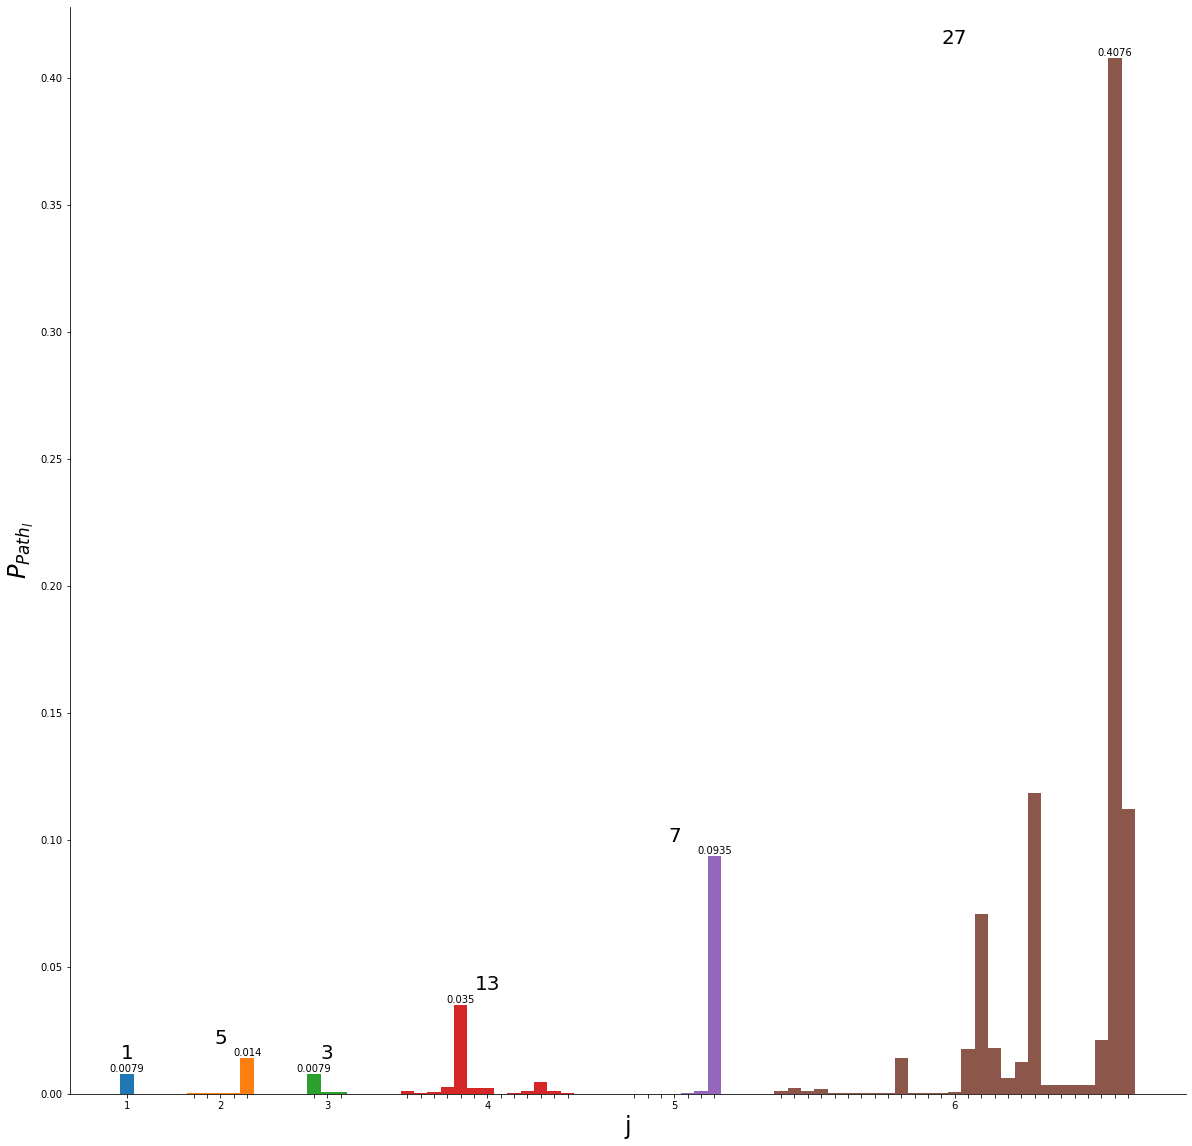

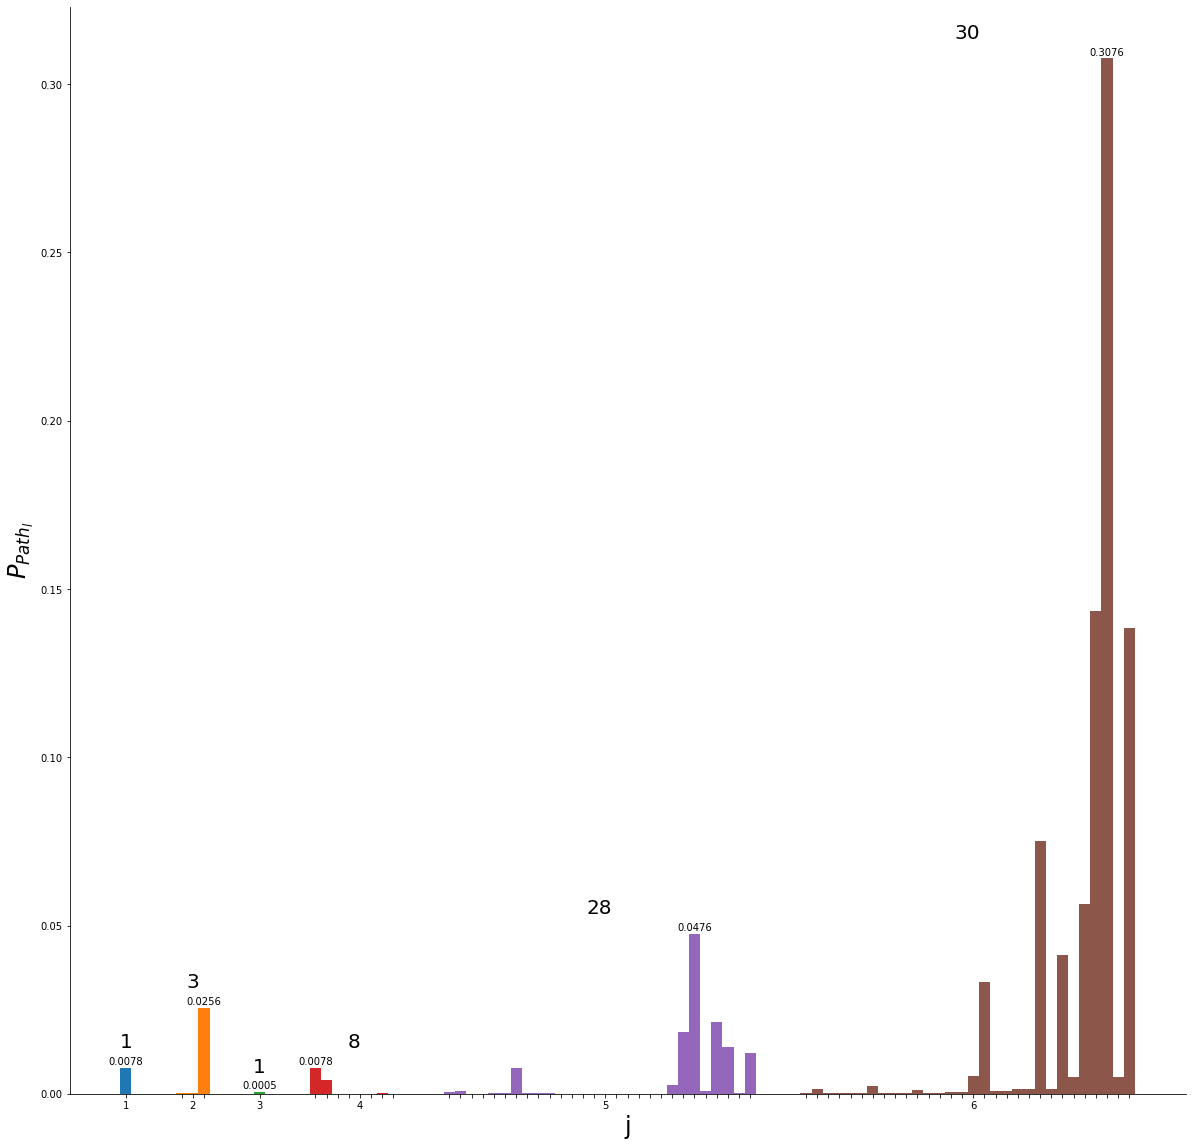

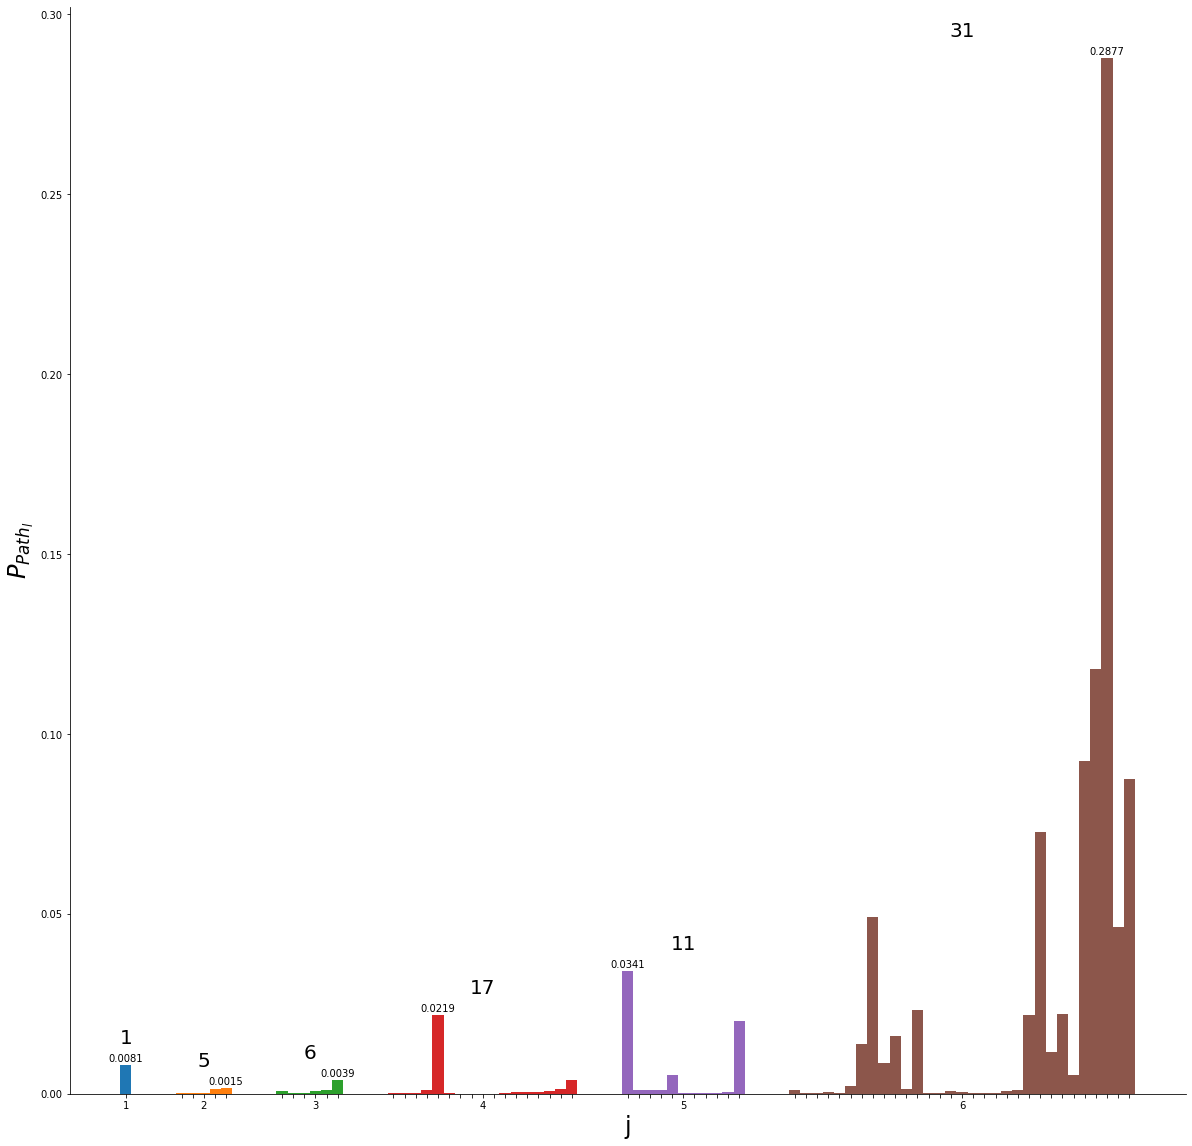

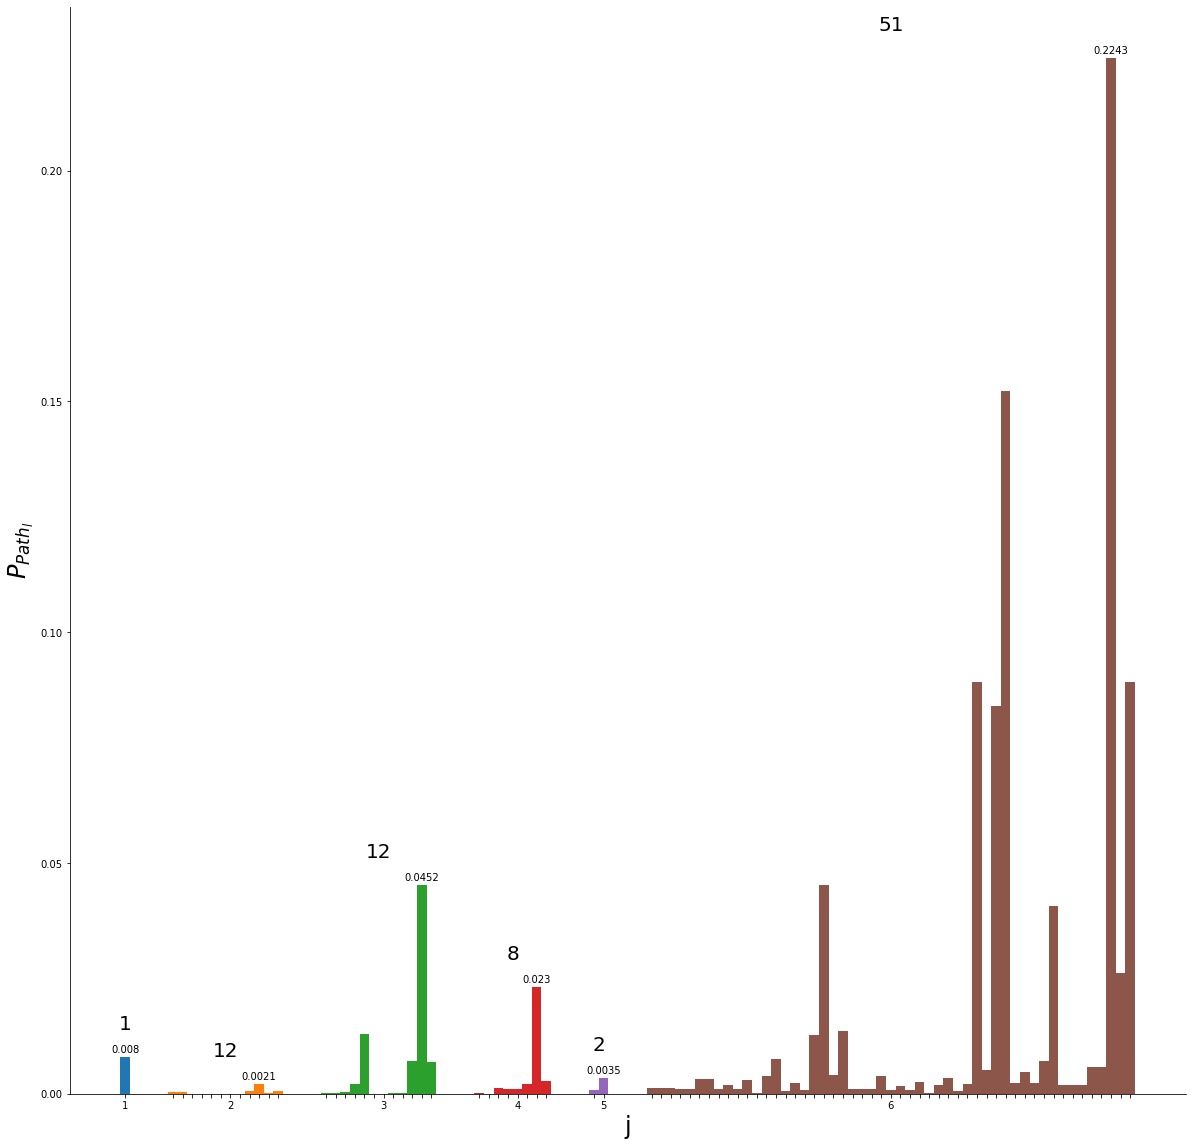

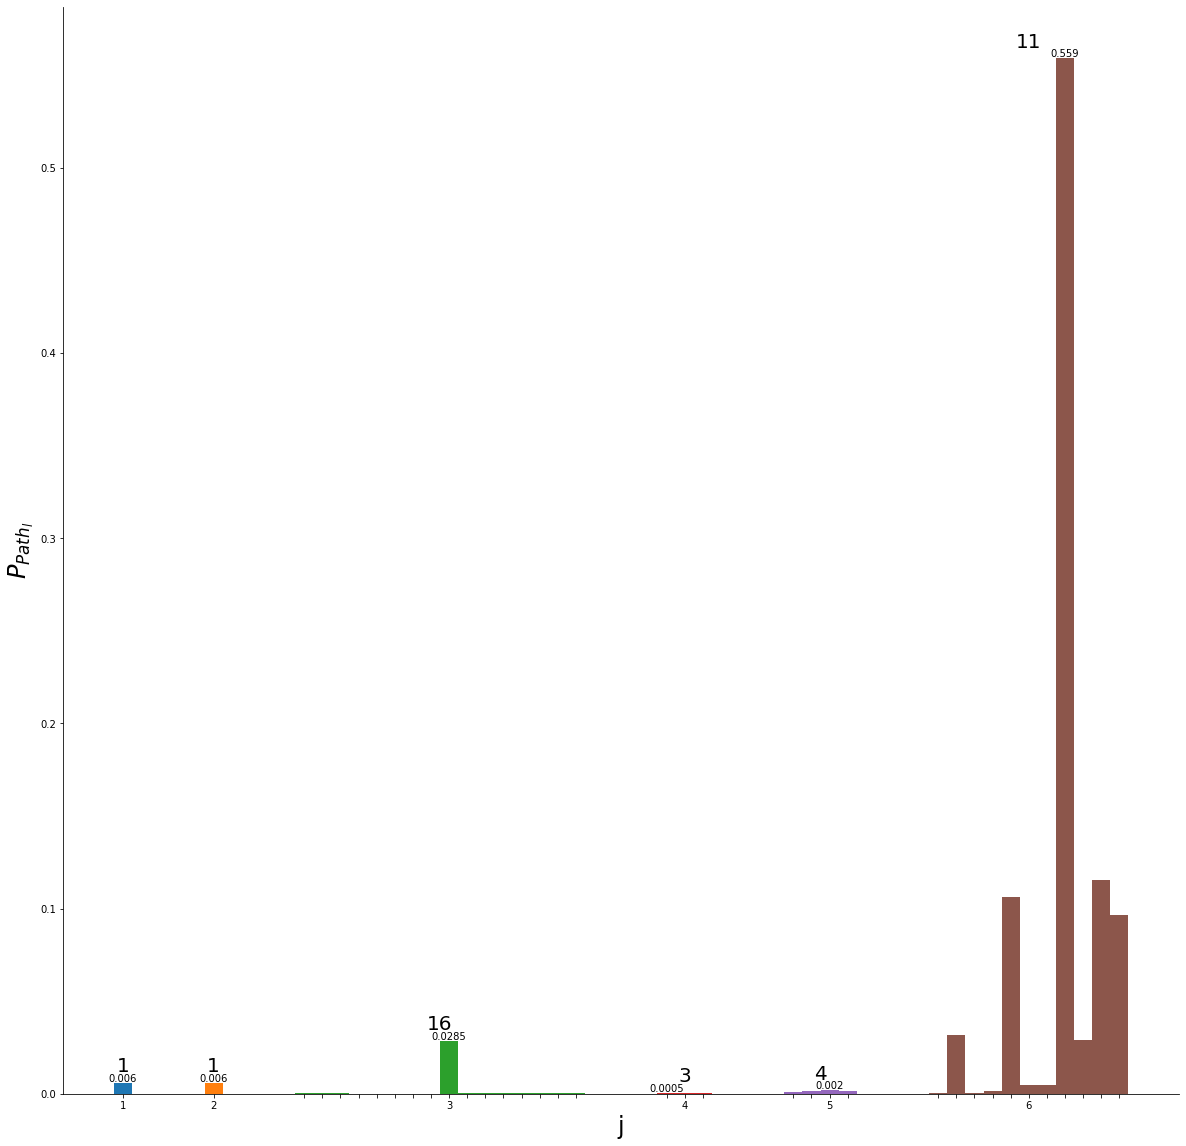

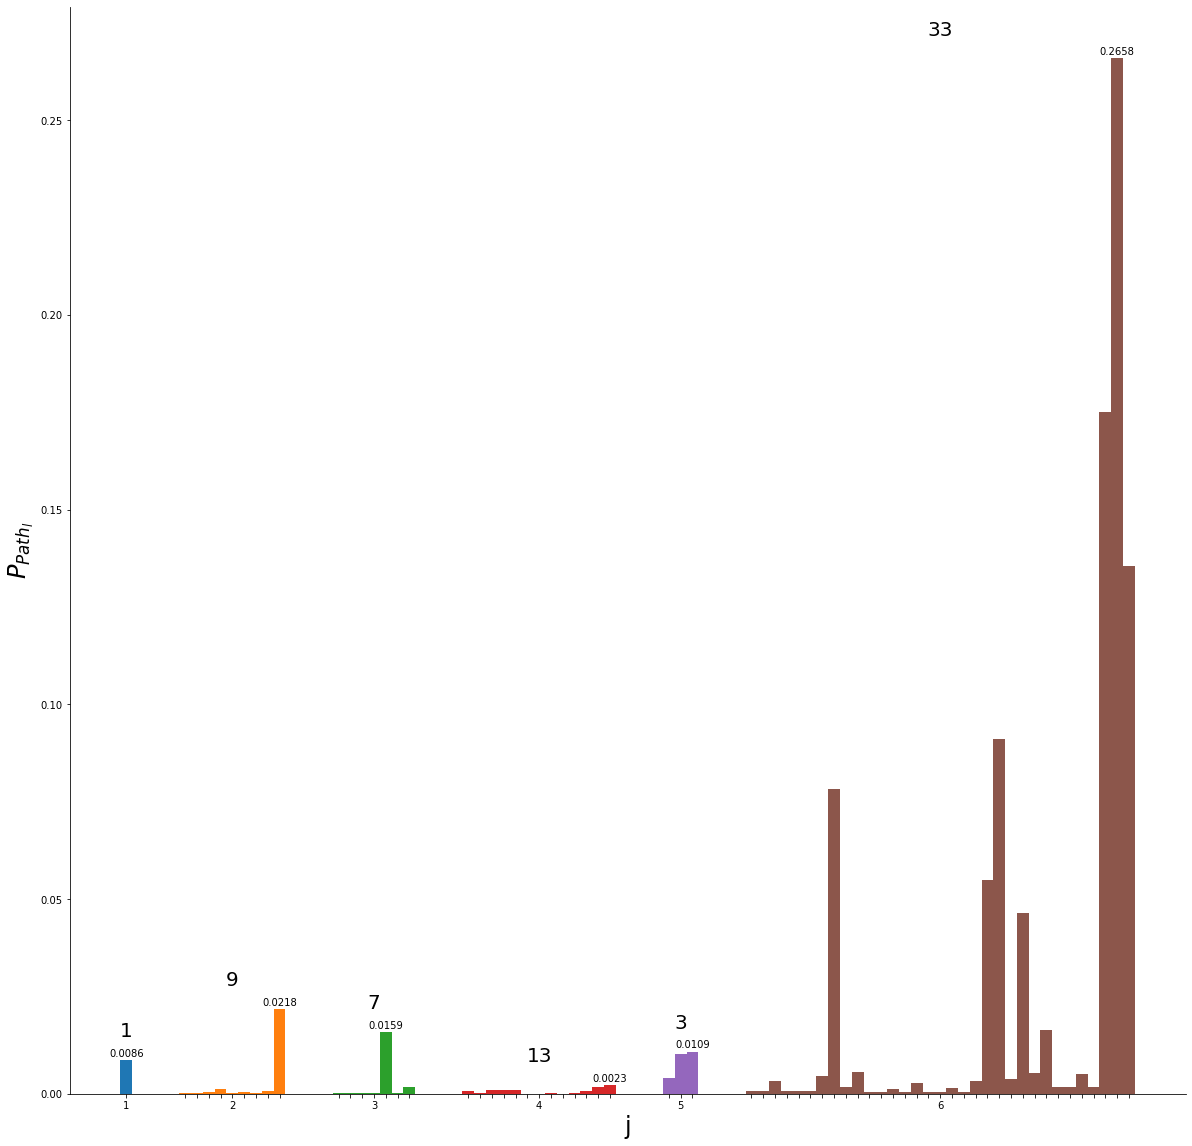

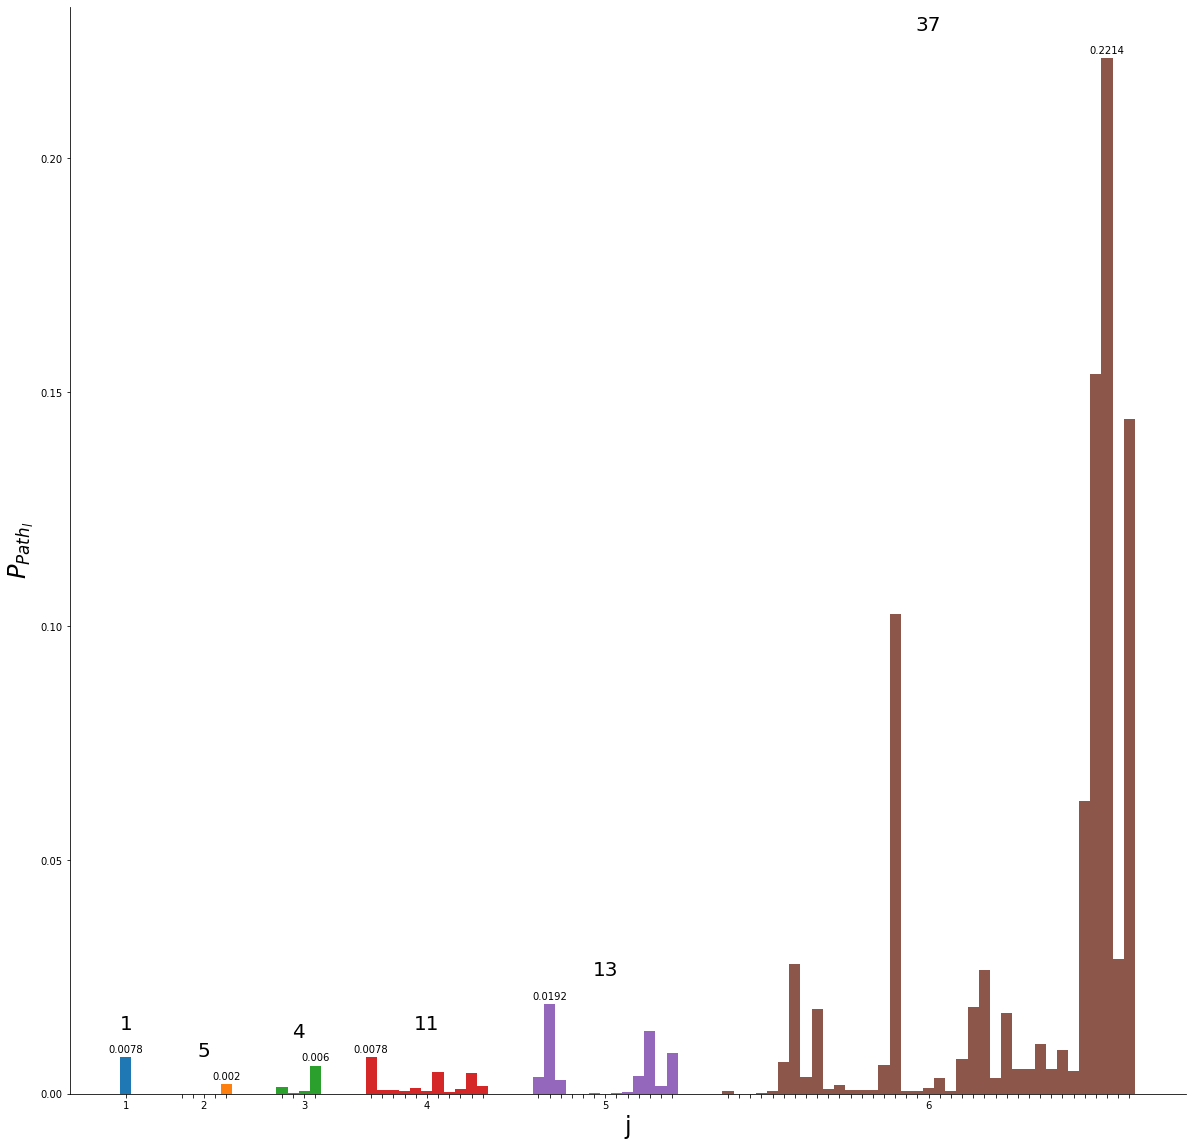

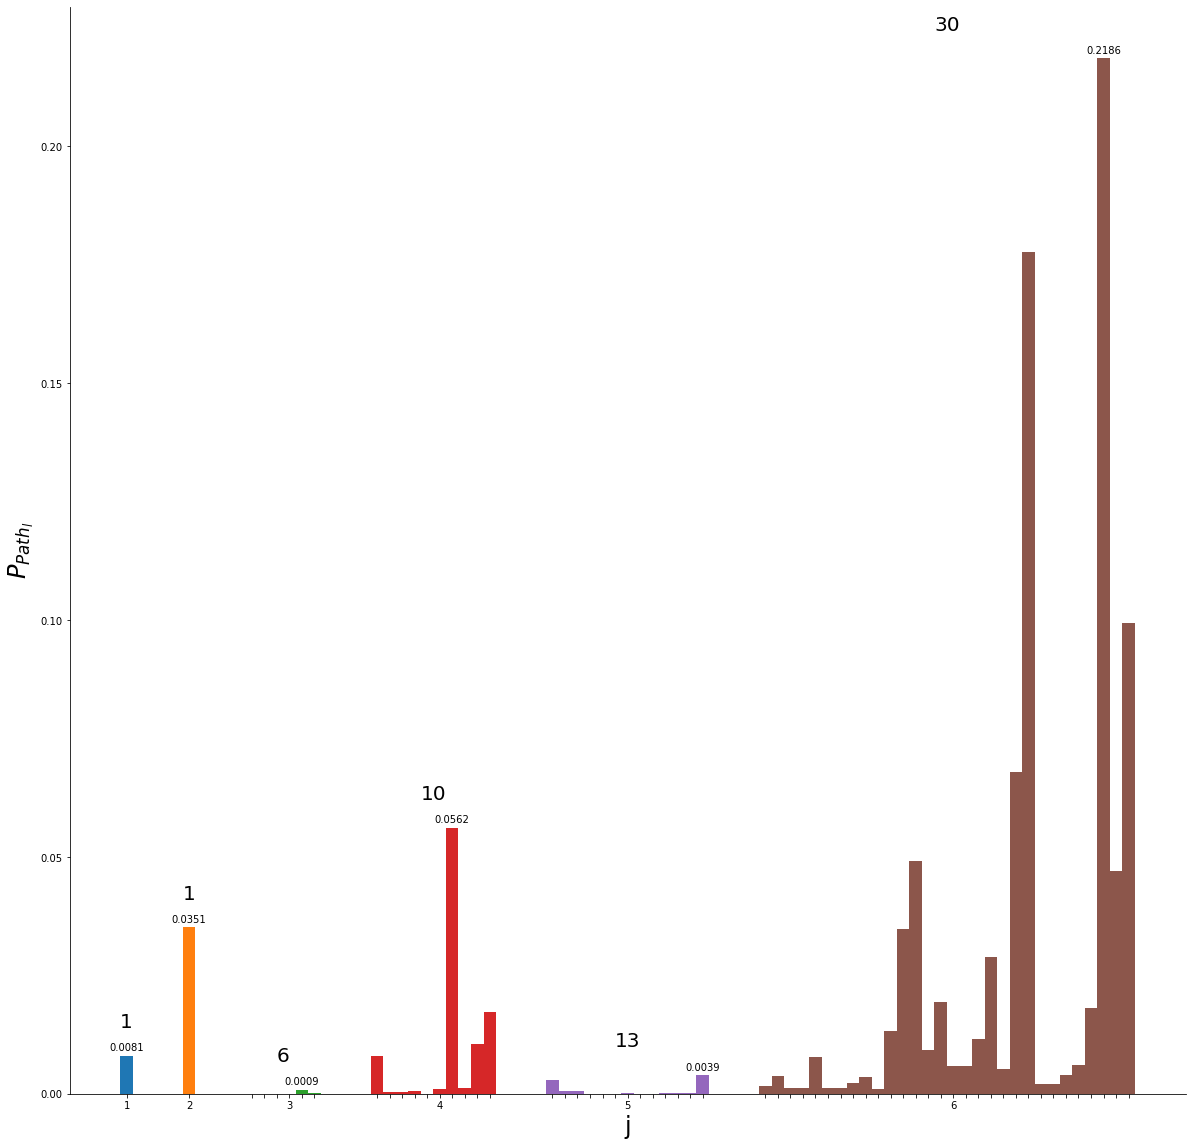

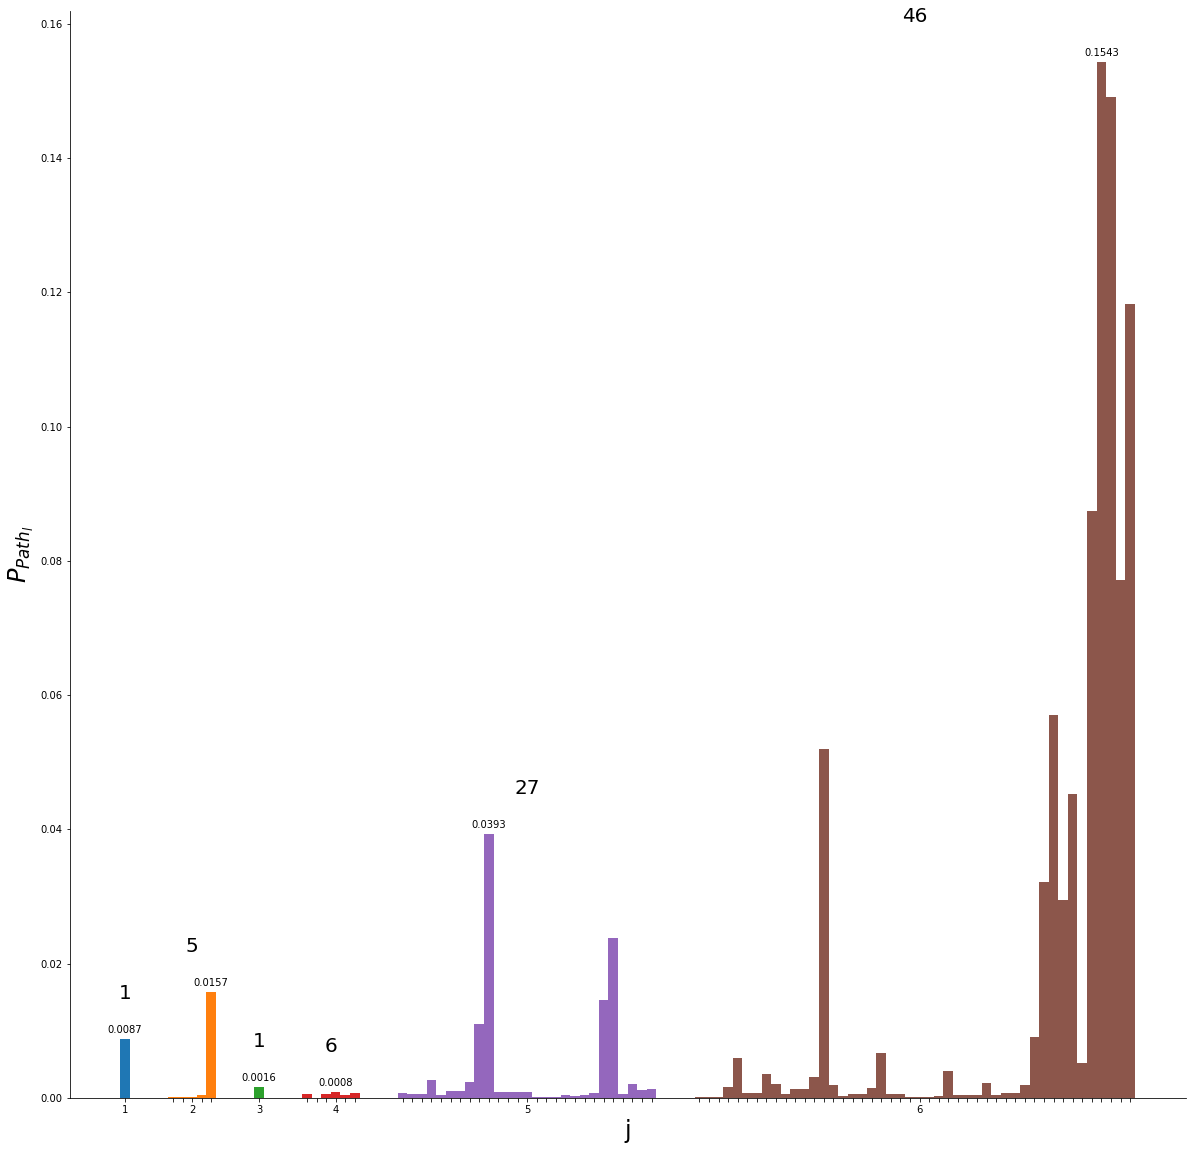

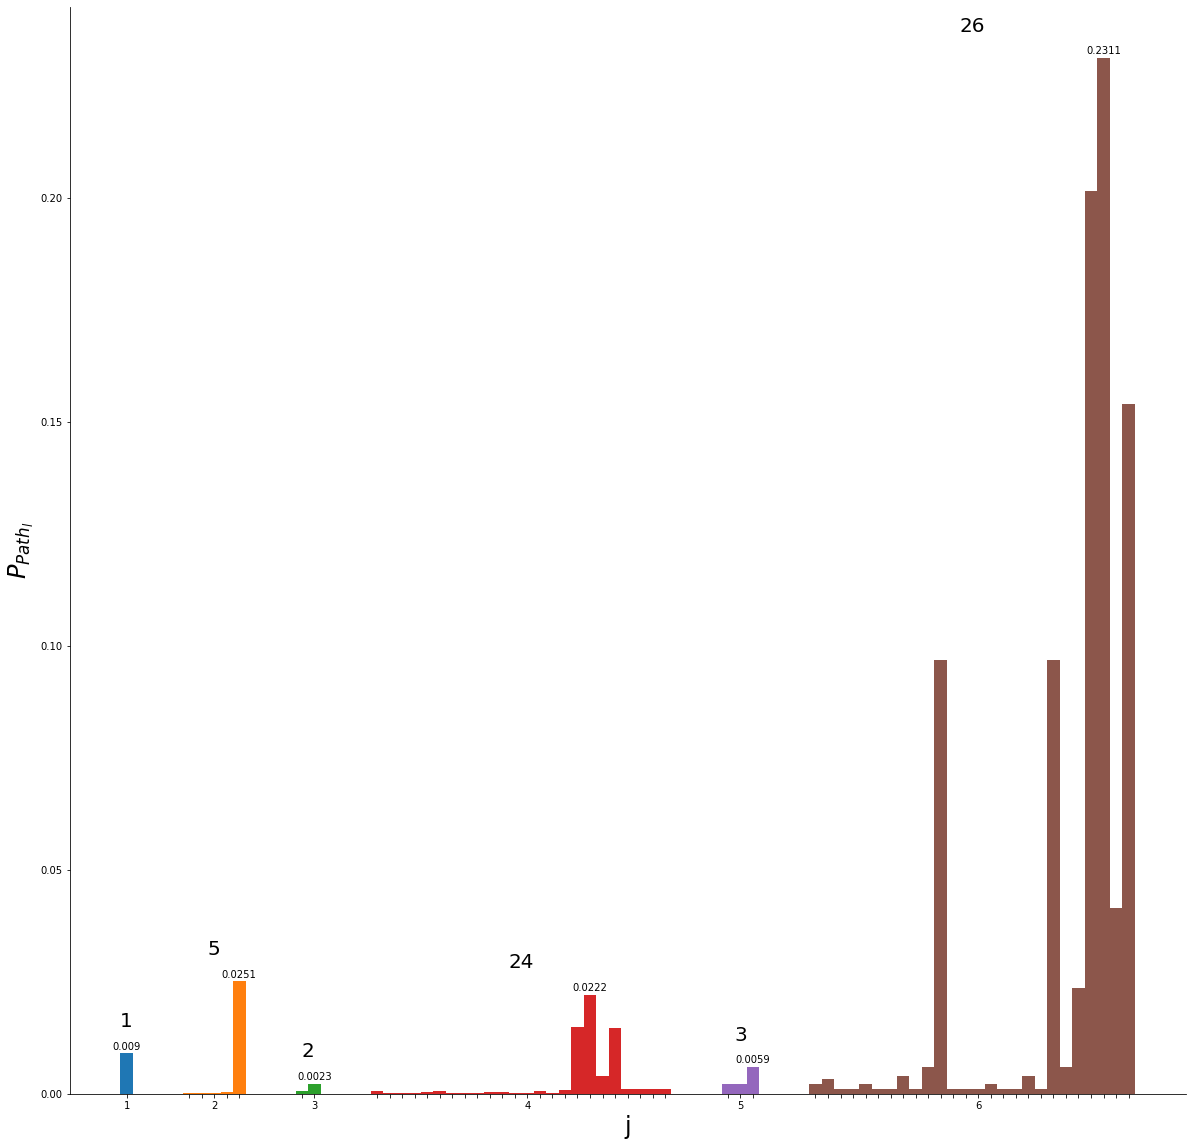

In [17]:
for report in reports:
    report.decision_probability_bar()

<Figure size 936x720 with 0 Axes>

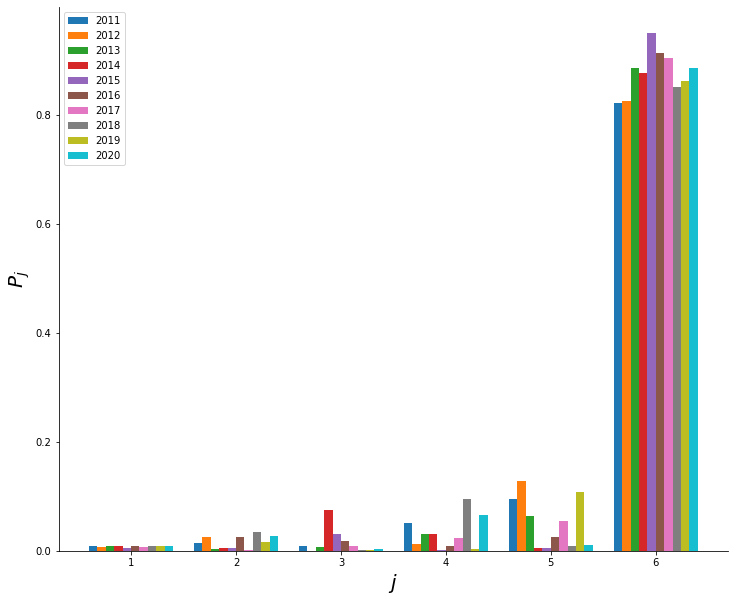

In [18]:
show_hierarchical_risk_bar(reports)